## 합성곱 신경망 (Convolutional Networks Networks, CNNs)
- 이미지 인식, 음성 인식 등에 자주 사용됨<br> 특히 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용
<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

##### 완전 연결계층과의 차이
- 완전연결계층(Fully-Connected Layer)은 이미지와 같은 데이터의 형상(3차원)을 무시함
- 모든 입력데이터를 동등하게 취급<br> 즉, 데이터의 특징을 잃어버리게 됨
- 컨볼루션층(convolution layer)은 **<U>이미지 픽셀 사이의 관계를 고려</U>**
- 완전연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지
    - 이미지와 같은 2차원(흑백) 또는 3차원(컬러)의 형상을 유지
    - 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 수의 파라미터를 요구

## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의) 
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

### 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정

- 과거에 많이 사용, 요즘은 잘 사용되지 않는다.

- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해  
  특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">

  <sub>출처: https://www.researchgate.net/figure/Average-pooling-example_fig21_329885401</sub>

## 합성곱 연산의 의미
### 2차원 이미지에 대한 필터 연산 예시
  - 가장 자리 검출(Edge-Detection)

  - 소벨 필터(Sobel Filter)

    - Horizontal : 가로 방향의 미분을 구하는 필터 역할

    - Vertical : 세로 방향의 미분을 구하는 필터 역할  

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_ZRkuiCkv0ZEHFiyCp-7Y5bCL0liaYSQ4mg&usqp=CAU" width="350">

  <sub>출처: https://www.cloras.com/blog/image-recognition/</sub>


# CNN start

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

#### util functions

In [2]:
def url_to_image(url, gray = False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    
    if gray == True:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

def filtered_image(image, filter, output_size):
    filtered_img = np.zeros((output_size, output_size))
    filter_size = filter.shape[0]
    
    for i in range(output_size):
        for j in range(output_size):
            multiply_values = image[i:(i + filter_size), j:(j+filter_size)] * filter
            sum_value = np.sum(multiply_values)
            
            if(sum_value > 255):
                sum_value = 255
                
            filtered_img[i, j] = sum_value
    
    return filtered_img

#### 이미지 확인
- 예시이므로 정사각형 사이즈로 진행

image.shape :  (440, 440)


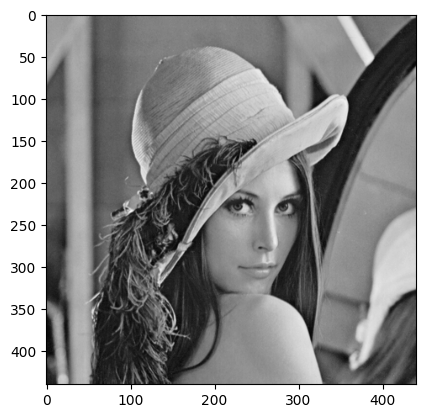

In [3]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image = url_to_image(img_url,gray=True)

print("image.shape : ", image.shape)

plt.imshow(image,cmap='gray')
plt.show()

#### 필터연산 적용

output_size :  438


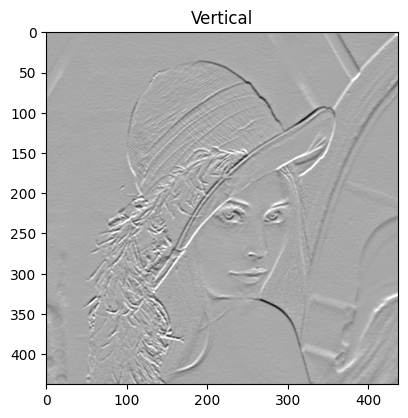

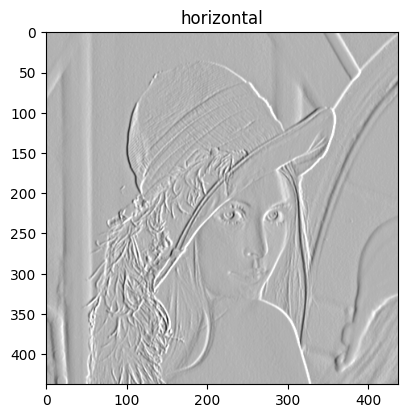

In [5]:
vertical_filter = np.array([[1., 2., 1.],
                            [0., 0., 0.],
                            [-1., -2., -1.]])
horizontal_filter = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

output_size = int((image.shape[0] - 3)/ 1 + 1)
print("output_size : ", output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.title("Vertical")
plt.imshow(vertical_filtered, cmap='gray')

plt.figure(figsize=(10, 10))
plt.subplot(1,2,2)
plt.title("horizontal")
plt.imshow(horizontal_filtered, cmap='gray')


#### 이미지 필터를 적용한 최종 결과

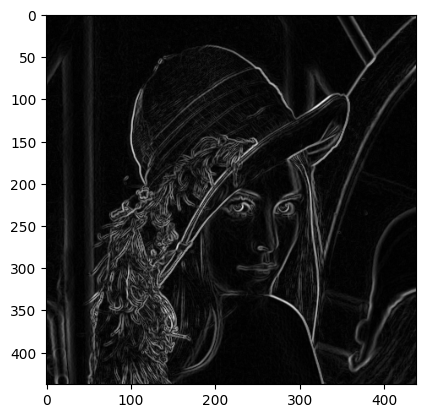

In [6]:
sobel_img = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))
plt.imshow(sobel_img,cmap='gray')

## 3차원 데이터의 합성곱 연산
- **이미지는 3차원으로 구성**
  - (가로, 세로, 채널 수)
  - 채널 : RGB 

- 색상값의 정도에 따라 color색 결정

  <img src="https://www.projectorcentral.com/images/articles/RGB-Explained-600.jpg">

  <sub>출처: https://www.projectorcentral.com/All-About-Bit-Depth.htm?page=What-Bit-Depth-Looks-Like</sub>

### 아래의 이미지 확인은 참고사항

image.shape :  (440, 440, 3)


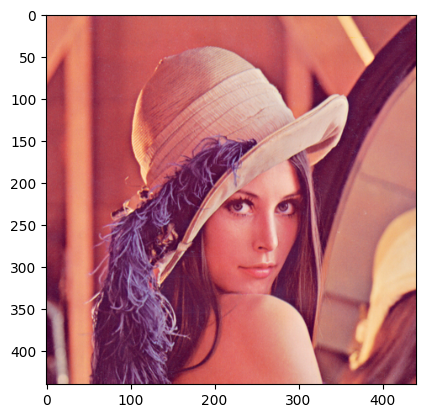

In [7]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image = url_to_image(img_url)

print("image.shape : ", image.shape)

plt.imshow(image)
plt.show()

In [11]:
image_copy = image.copy()

image_copy[:, :, 1]=0 # green
image_copy[:, :, 2]=0 # blue
image_red = image_copy

print(image_red)

[[[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [232   0   0]
  [223   0   0]
  [201   0   0]]

 ...

 [[ 84   0   0]
  [ 86   0   0]
  [ 93   0   0]
  ...
  [174   0   0]
  [169   0   0]
  [172   0   0]]

 [[ 82   0   0]
  [ 86   0   0]
  [ 95   0   0]
  ...
  [177   0   0]
  [178   0   0]
  [183   0   0]]

 [[ 81   0   0]
  [ 86   0   0]
  [ 96   0   0]
  ...
  [178   0   0]
  [181   0   0]
  [185   0   0]]]


In [12]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 2] = 0
image_green = image_copy

print(image_green)

[[[  0 137   0]
  [  0 137   0]
  [  0 136   0]
  ...
  [  0 150   0]
  [  0 136   0]
  [  0 102   0]]

 [[  0 137   0]
  [  0 137   0]
  [  0 136   0]
  ...
  [  0 150   0]
  [  0 136   0]
  [  0 102   0]]

 [[  0 137   0]
  [  0 137   0]
  [  0 136   0]
  ...
  [  0 149   0]
  [  0 134   0]
  [  0 101   0]]

 ...

 [[  0  18   0]
  [  0  21   0]
  [  0  25   0]
  ...
  [  0  72   0]
  [  0  70   0]
  [  0  62   0]]

 [[  0  20   0]
  [  0  24   0]
  [  0  29   0]
  ...
  [  0  68   0]
  [  0  71   0]
  [  0  70   0]]

 [[  0  22   0]
  [  0  25   0]
  [  0  31   0]
  ...
  [  0  67   0]
  [  0  71   0]
  [  0  74   0]]]


In [13]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 1] = 0
image_blue = image_copy

print(image_blue)

[[[  0   0 124]
  [  0   0 127]
  [  0   0 132]
  ...
  [  0   0 123]
  [  0   0 114]
  [  0   0  92]]

 [[  0   0 124]
  [  0   0 127]
  [  0   0 132]
  ...
  [  0   0 123]
  [  0   0 114]
  [  0   0  92]]

 [[  0   0 124]
  [  0   0 127]
  [  0   0 132]
  ...
  [  0   0 122]
  [  0   0 113]
  [  0   0  92]]

 ...

 [[  0   0  60]
  [  0   0  58]
  [  0   0  58]
  ...
  [  0   0  84]
  [  0   0  78]
  [  0   0  80]]

 [[  0   0  58]
  [  0   0  59]
  [  0   0  60]
  ...
  [  0   0  78]
  [  0   0  80]
  [  0   0  80]]

 [[  0   0  56]
  [  0   0  58]
  [  0   0  62]
  ...
  [  0   0  76]
  [  0   0  81]
  [  0   0  81]]]


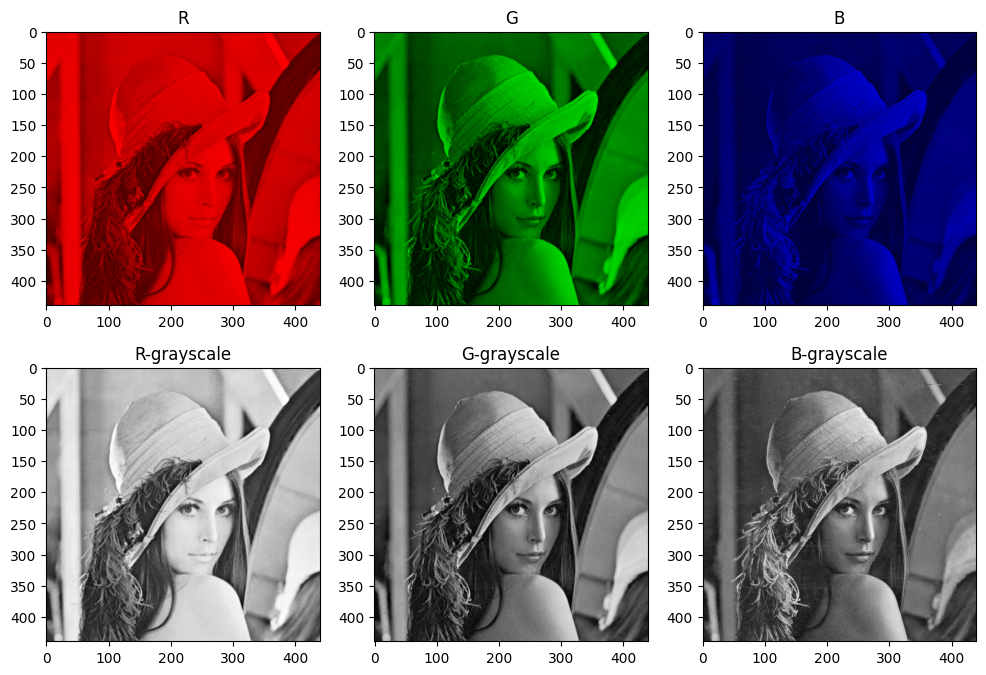

In [14]:
fig = plt.figure(figsize=(12,8))

title_list = ['R',
              'G',
              'B',
              'R-grayscale',
              'G-grayscale',
              'B-grayscale'
              ]
img_list = [image_red,
            image_green,
            image_blue,
            image_red[:,:,0],
            image_green[:,:,1],
            image_blue[:,:,2]
            ]
for i, image in enumerate(img_list):
    ax = fig.add_subplot(2, 3, i+1)
    ax.title.set_text("{}".format(title_list[i]))
    
    if i >= 3:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

plt.show()


### 연산 과정

- 각 채널마다 컨볼루션 연산을 적용
  - 3채널을 모두 합쳐서 '하나의 필터'라고 칭함  
    
  <img src="https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="600">

<br>

- 각각의 결과를 더함  
  
  <img src="https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="600">

<br>

- 더한 결과에 편향을 더함  
  <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="300">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>

